In [104]:
import numpy as np
import seaborn as sns
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('bmh')

In [166]:
symbols = ['PLUG', 'MARA', 'GEVO', 'BNGO', 'CLSK', 'PACB', 'GP', 'GRWG', 'BLNK', 'SOL', 'SUNW', 'DAC']
noa = len(symbols)

In [167]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo',start='2020-01-01',
                               end='2021-01-01')['Adj Close']
data.columns = symbols

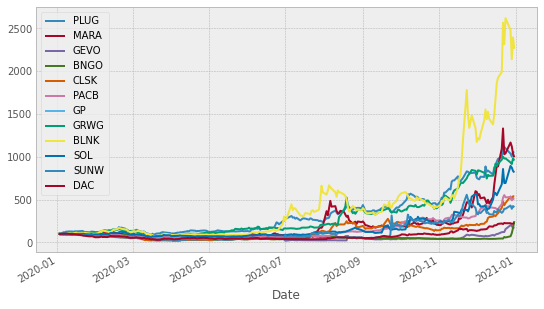

In [168]:
 (data / data.iloc[0] * 100).plot(figsize=(8, 5))


In [169]:
rets = np.log(data / data.shift(1))
rets.mean() * 252


PLUG    2.348137
MARA    2.296854
GEVO    0.571450
BNGO    0.909818
CLSK    1.682619
PACB    1.614850
GP      0.956895
GRWG    2.256902
BLNK    3.118792
SOL     2.099769
SUNW    1.408412
DAC     0.824082
dtype: float64

In [170]:
 rets.cov() * 252


,PLUG,MARA,GEVO,BNGO,CLSK,PACB,GP,GRWG,BLNK,SOL,SUNW,DAC
PLUG,0.918830,0.550414,0.228860,0.287974,0.293660,0.299553,0.567379,0.420897,0.513320,0.322195,0.273940,0.313075
MARA,0.550414,3.061807,0.489030,0.016863,0.138383,0.281541,0.324412,0.436960,0.611042,0.414096,0.248569,0.350184
GEVO,0.228860,0.489030,3.571850,0.115893,0.450301,0.065872,0.638923,-0.013371,0.520031,0.410647,0.105698,0.152238
BNGO,0.287974,0.016863,0.115893,2.002385,0.265147,0.079518,0.349888,0.160440,0.092965,0.097210,0.394468,0.190497
CLSK,0.293660,0.138383,0.450301,0.265147,2.740632,0.182592,0.432783,0.265038,0.575036,0.305291,0.012349,0.231213
PACB,0.299553,0.281541,0.065872,0.079518,0.182592,0.683102,0.096558,0.301725,0.318264,0.271026,0.102902,0.291452
GP,0.567379,0.324412,0.638923,0.349888,0.432783,0.096558,2.000548,0.446897,1.029067,0.615717,0.809531,0.267205
GRWG,0.420897,0.436960,-0.013371,0.160440,0.265038,0.301725,0.446897,1.108457,0.341447,0.231690,0.203973,0.273795
BLNK,0.513320,0.611042,0.520031,0.092965,0.575036,0.318264,1.029067,0.341447,2.156494,0.293970,0.211502,0.344673
SOL,0.322195,0.414096,0.410647,0.097210,0.305291,0.271026,0.615717,0.231690,0.293970,1.442797,0.321656,0.078814


Calculating Weights and Returns for Portfolio

In [171]:
weights = np.random.random(noa)
weights /= np.sum(weights)
weights


array([0.06725091, 0.02327695, 0.11935954, 0.11993073, 0.12003079,
       0.09251569, 0.11558628, 0.10637607, 0.11603353, 0.0445263 ,
       0.02743618, 0.04767701])

In [172]:
#Expected Portfolio Return
np.sum(rets.mean() * weights) * 252


1.6240613113486742

In [173]:
#Expected Portfolio Variance
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

0.49787627819388747

In [174]:
#Expected Portfolio Volatility
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))


0.7056034851061094

Monte Carlo Simulation Of Portfolio

In [175]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T,
                         np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

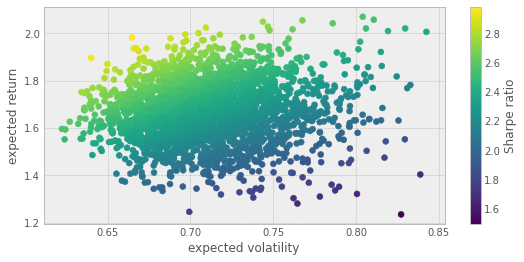

In [176]:
 #plotting
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

Portfolio Optimization

In [177]:
#Function for portfolio statistics
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [178]:
#Maximizing Sharpe Ratio
import scipy.optimize as sco
def min_func_sharpe(weights):
             return -statistics(weights)[2]

In [179]:
#Constraints, weights must add up to one
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
#Weights bound between 0,1
bnds = tuple((0, 1) for x in range(noa))

In [180]:
#Starting Parameter list for optimization(Equally Weighted)
noa * [1. / noa,]


[0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333]

In [181]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                                bounds=bnds, constraints=cons)

CPU times: user 197 ms, sys: 0 ns, total: 197 ms
Wall time: 198 ms


In [182]:
#calling function for portfolio statistics
opts

     fun: -3.211305001981956
     jac: array([ 4.42385674e-04, -3.78489494e-04,  7.25664139e-01, -1.00570917e-03,
       -1.84029341e-04, -3.57925892e-05,  2.21484706e+00,  3.77655029e-04,
        4.27007675e-04, -1.12459064e-03, -2.18635798e-03,  5.72843164e-01])
 message: 'Optimization terminated successfully.'
    nfev: 165
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([2.27670212e-01, 2.06748399e-02, 5.94284075e-17, 2.04796805e-02,
       2.28859728e-02, 1.63737360e-01, 5.22938748e-16, 2.07445479e-01,
       1.67186013e-01, 1.49952004e-01, 1.99684393e-02, 6.54742829e-17])

In [183]:
#optimal portfolio allocation
opts['x'].round(3)
['PLUG', 'MARA', 'GEVO', 'BNGO', 'CLSK', 'PACB', 'GP', 'GRWG', 'BLNK', 'SOL', 'SUNW','DAC']

array([0.228, 0.021, 0.   , 0.02 , 0.023, 0.164, 0.   , 0.207, 0.167,
       0.15 , 0.02 , 0.   ])

In [123]:
pstats = statistics(opts['x']).round(3)


In [124]:
print('Expected return',pstats[0])
print('Expected volatility',pstats[1])
print('Optimal Sharpe Ratio',pstats[2])

Expected return 2.236
Expected volatility 0.696
Optimal Sharpe Ratio 3.211


Minimizing Variance of Portfolio

In [125]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [126]:
 optv = sco.minimize(min_func_variance, noa * [1. / noa,],
                        method='SLSQP', bounds=bnds,
                        constraints=cons)

In [127]:
optv

     fun: 0.37540445788298454
     jac: array([0.75097849, 0.75094896, 0.75093156, 0.75079723, 0.75079751,
       0.75083108, 0.75127947, 0.75077327, 0.75098219, 0.75046092,
       0.75085511])
 message: 'Optimization terminated successfully.'
    nfev: 137
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.08847352, 0.02082109, 0.06474014, 0.12474041, 0.0517885 ,
       0.3534412 , 0.00048881, 0.1365601 , 0.02124804, 0.09393182,
       0.04376638])

In [128]:
optv['x'].round(3)

array([0.088, 0.021, 0.065, 0.125, 0.052, 0.353, 0.   , 0.137, 0.021,
       0.094, 0.044])

In [129]:
statistics(optv['x']).round(3)


array([1.698, 0.613, 2.771])

Creating the Efficient Frontier

In [130]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
         {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [131]:
#Function to return volatility from statistics function
def min_func_port(weights):
    return statistics(weights)[1]

In [132]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                      bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 24 s, sys: 13 ms, total: 24 s
Wall time: 24.1 s


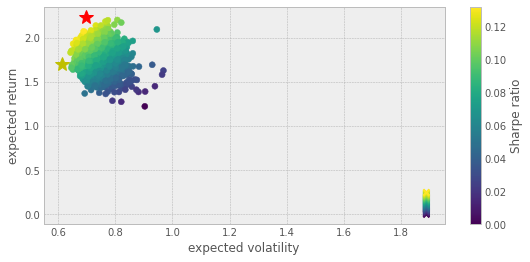

In [133]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o')
# random portfolio composition
plt.scatter(tvols, trets,
             c=trets / tvols, marker='x')
# efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
        'r*', markersize=15.0)
# portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0)
# minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')